In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast

In [2]:
df = pd.read_csv('data/unstructured_data.csv')['predictions']
df.head()

0    {'animal/dog': '0.649', 'humans/others': '0.24...
1    {'mechanical/air_conditioner': '0.34', 'humans...
2    {'humans/others': '0.309', 'animal/dog': '0.15...
3    {'mechanical/others': '0.341', 'humans/others'...
4    {'environmental/others': '0.377', 'mechanical/...
Name: predictions, dtype: object

In [3]:
d = [ast.literal_eval(d) for d in pd.read_csv('data/unstructured_data.csv')['predictions'].values]
d[0]

{'animal/dog': '0.649',
 'humans/others': '0.241',
 'animal/others': '0.05',
 'environmental/others': '0.017',
 'animal/bird': '0.014'}

In [4]:
preds = pd.DataFrame(d).astype('float').fillna(0.0)
preds.head(5)

,animal/dog,humans/others,animal/others,environmental/others,animal/bird,mechanical/air_conditioner,alerts/horns,alerts/siren,mechanical/others,mechanical/impact,Music/music,mechanical/explosives,vehicles/airborne,mechanical/digging,environmental/wind,environmental/rain,vehicles/others,environmental/waves,mechanical/cutting,alerts/bells
0,0.649,0.241,0.050,0.017,0.014,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.0
1,0.026,0.233,0.029,0.011,0.000,0.340,0.135,0.086,0.040,0.031,0.019,0.017,0.016,0.000,0.00,0.0,0.0,0.0,0.0,0.0
2,0.154,0.309,0.012,0.123,0.013,0.090,0.043,0.083,0.034,0.000,0.105,0.000,0.000,0.015,0.00,0.0,0.0,0.0,0.0,0.0
3,0.000,0.161,0.016,0.031,0.000,0.132,0.000,0.041,0.341,0.000,0.093,0.000,0.105,0.000,0.04,0.0,0.0,0.0,0.0,0.0
4,0.015,0.093,0.000,0.377,0.014,0.233,0.037,0.039,0.125,0.000,0.013,0.034,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.0


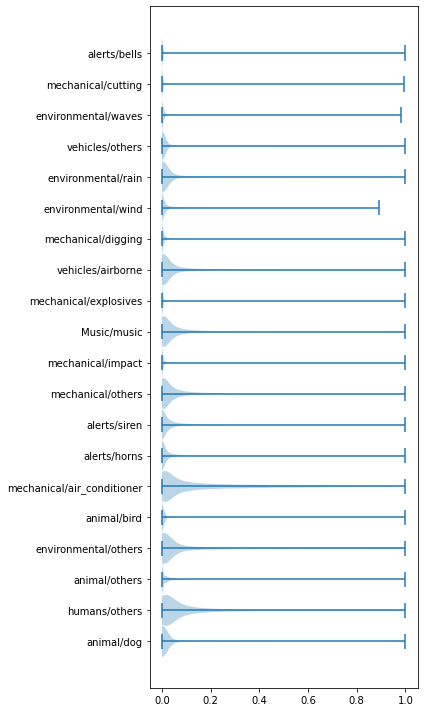

In [5]:
fig, ax = plt.subplots(figsize=(6, 10), tight_layout=True, facecolor='w')
ax.violinplot(preds.values, vert=False, widths=1.)
ax.set_yticks(range(1, len(preds.columns)+1))
ax.set_yticklabels(preds.columns);

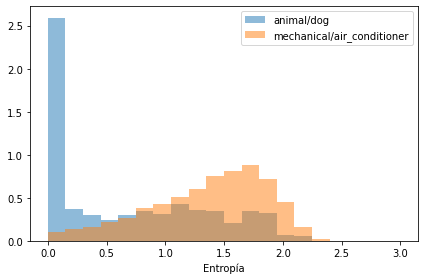

In [6]:
entropy = -np.sum(preds.values*np.log(preds.values + 1e-10), axis=1)

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True, facecolor='w')
for d in [0, 5]:
    mask = np.argmax(preds.values, axis=1) == d
    ax.hist(entropy[mask], range=(0, -np.log(1/20)), bins=20, density=True, alpha=0.5, label=preds.columns[d])
ax.set_xlabel('Entropía')
ax.legend();

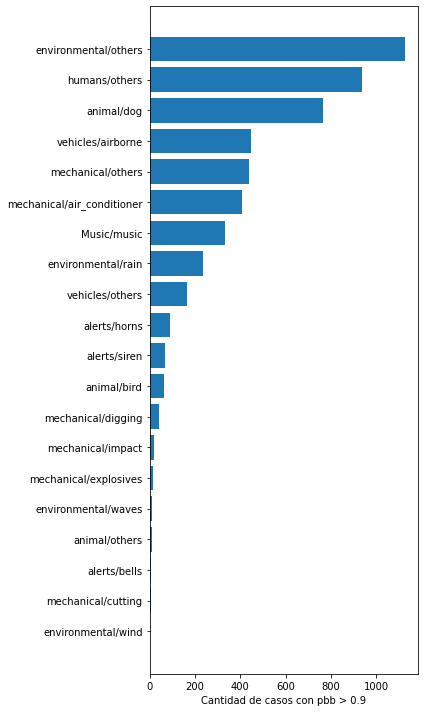

In [9]:
fig, ax = plt.subplots(figsize=(6, 10), tight_layout=True, facecolor='w')
th = 0.9
bars = np.array([sum(preds[col].values > th) for col in preds.columns])
idx = np.argsort(bars)
ax.barh(y=preds.columns[idx], width=bars[idx]);
ax.set_xlabel(f'Cantidad de casos con pbb > {th}');